<a href="https://colab.research.google.com/github/Bhuvan068/AI-for-All-Challenge-Anganwadi-AI-/blob/main/Anganwadi_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving gender_based_IMR.csv to gender_based_IMR.csv
Saving Infant_Mortality_Rate_1.csv to Infant_Mortality_Rate_1.csv
Saving state_IMR.csv to state_IMR.csv
Saving trends_residence_2006-2012_IMR.csv to trends_residence_2006-2012_IMR.csv
Saving trends_residence_IMR.csv to trends_residence_IMR.csv
Saving babies.csv to babies.csv
Saving table7.csv to table7.csv
Saving table8.csv to table8.csv
Saving RS_Session_256_AU_108_A.csv to RS_Session_256_AU_108_A.csv
Saving 20ec548f-a099-48cb-b004-ce245d466f70.kml to 20ec548f-a099-48cb-b004-ce245d466f70.kml


In [ ]:
import pandas as pd
from google.colab import files

file_names = [
    'gender_based_IMR.csv',
    'Infant_Mortality_Rate_1.csv',
    'state_IMR.csv',
    'trends_residence_2006-2012_IMR.csv',
    'trends_residence_IMR.csv',
    'babies.csv',
    'table7.csv',
    'table8.csv',
    'RS_Session_256_AU_108_A.csv'
]

dataframes = {}
for file in file_names:
    df = pd.read_csv(file)
    dataframes[file] = df
    print(f"{file} loaded. Shape: {df.shape}")
    print(df.head(), "\n")


gender_based_IMR.csv loaded. Shape: (21, 246)
  India/States/Uts  2001-Total  2001-Male  2001-Female  2002-Total  2002-Male  \
0            INDIA        66.0       64.0         68.0        63.0       62.0   
1   Andhra Pradesh        66.0       65.0         68.0        62.0       64.0   
2            Assam        74.0       69.0         80.0        70.0       70.0   
3            Bihar        62.0       57.0         68.0        61.0       56.0   
4     Chhattisgarh         NaN        NaN          NaN         NaN        NaN   

   2002-Female  2003-Total  2003-Male  2003-Female  ...  Unnamed: 236  \
0         65.0        60.0       57.0         64.0  ...           NaN   
1         60.0        59.0       59.0         59.0  ...           NaN   
2         71.0        67.0       69.0         65.0  ...           NaN   
3         66.0        60.0       59.0         62.0  ...           NaN   
4          NaN         NaN        NaN          NaN  ...           NaN   

   Unnamed: 237  Unnamed: 23

In [ ]:
!pip install geopandas fastkml

import geopandas as gpd
from fastkml import kml

# Path to KML file
kml_file = '20ec548f-a099-48cb-b004-ce245d466f70.kml'

# Load using geopandas
gdf = gpd.read_file(kml_file, driver='KML')
print("KML loaded. Number of points:", len(gdf))
gdf.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 kB 3.6 MB/s eta 0:00:00
KML loaded. Number of points: 35364


,id,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,...,Water_Facility,Electricity,Longitude,Latitude,NEAR_FID,NEAR_DIST,NEAR_X,NEAR_Y,NEAR_ANGLE,geometry
0,None,None,None,NaT,NaT,NaT,None,-1,0,-1,...,YES,NO,78.490220,17.334449,7902.0,0.003083,78.490573,17.337512,83.425863,POINT (78.49022 17.33445)
1,None,None,None,NaT,NaT,NaT,None,-1,0,-1,...,YES,YES,78.462758,17.367225,14531.0,0.003094,78.462888,17.370316,87.591690,POINT (78.46276 17.36722)
2,None,None,None,NaT,NaT,NaT,None,-1,0,-1,...,YES,NO,78.486671,17.385044,5437.0,0.000585,78.486782,17.385618,79.055218,POINT (78.48667 17.38504)
3,None,None,None,NaT,NaT,NaT,None,-1,0,-1,...,YES,YES,78.477186,17.403259,4619.0,0.006189,78.474525,17.397671,-115.463745,POINT (78.47719 17.40326)
4,None,None,None,NaT,NaT,NaT,None,-1,0,-1,...,YES,NO,72.604200,22.973200,-1.0,-1.000000,-1.000000,-1.000000,0.000000,POINT (72.6042 22.9732)


In [ ]:
def clean_dataframe(df):
    # Drop unnamed columns
    df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

    # Clean column names
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("%", "percent")
        .str.replace("-", "_")
        .str.replace("/", "_")
        .str.replace("__", "_")
    )
    return df


# Apply cleaning to all CSV dataframes
for key in dataframes:
    dataframes[key] = clean_dataframe(dataframes[key])
    print(f"{key} cleaned → shape: {dataframes[key].shape}")


gender_based_IMR.csv cleaned → shape: (21, 37)
Infant_Mortality_Rate_1.csv cleaned → shape: (36, 43)
state_IMR.csv cleaned → shape: (36, 44)
trends_residence_2006-2012_IMR.csv cleaned → shape: (38, 22)
trends_residence_IMR.csv cleaned → shape: (23, 16)
babies.csv cleaned → shape: (1236, 8)
table7.csv cleaned → shape: (20, 9)
table8.csv cleaned → shape: (20, 15)
RS_Session_256_AU_108_A.csv cleaned → shape: (39, 9)


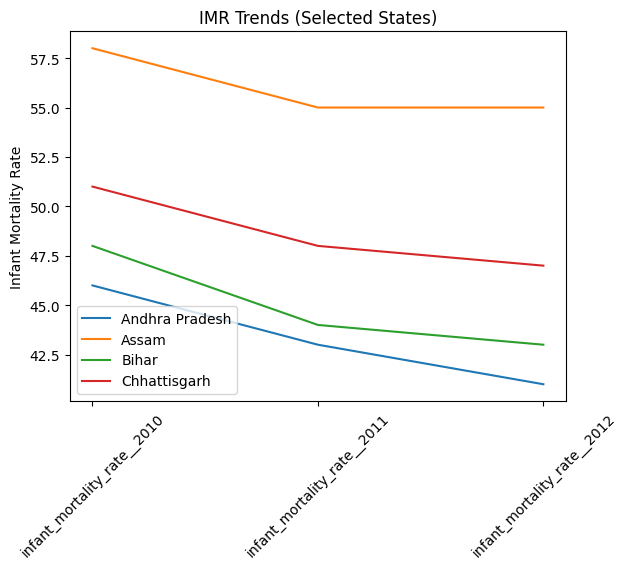

In [ ]:
import matplotlib.pyplot as plt

state_imr = dataframes['state_IMR.csv']

# Filter only states (remove country average)
state_only = state_imr[state_imr['category'] == 'State']

# Select recent years for clarity
year_cols = [c for c in state_only.columns if '201' in c]

# Plot IMR trend for few major states
states_to_plot = ['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh']

plt.figure()
for state in states_to_plot:
    row = state_only[state_only['country_state_ut_name'] == state]
    plt.plot(year_cols, row[year_cols].values.flatten(), label=state)

plt.xticks(rotation=45)
plt.ylabel("Infant Mortality Rate")
plt.title("IMR Trends (Selected States)")
plt.legend()
plt.show()


In [ ]:
# Remove rows with missing state names or IMR values
residence_clean = residence.dropna(
    subset=['india_states_uts', 'rural_2012', 'urban_2012']
)

# Convert state names to string (extra safety)
residence_clean['india_states_uts'] = residence_clean['india_states_uts'].astype(str)


/tmp/ipython-input-294842004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residence_clean['india_states_uts'] = residence_clean['india_states_uts'].astype(str)


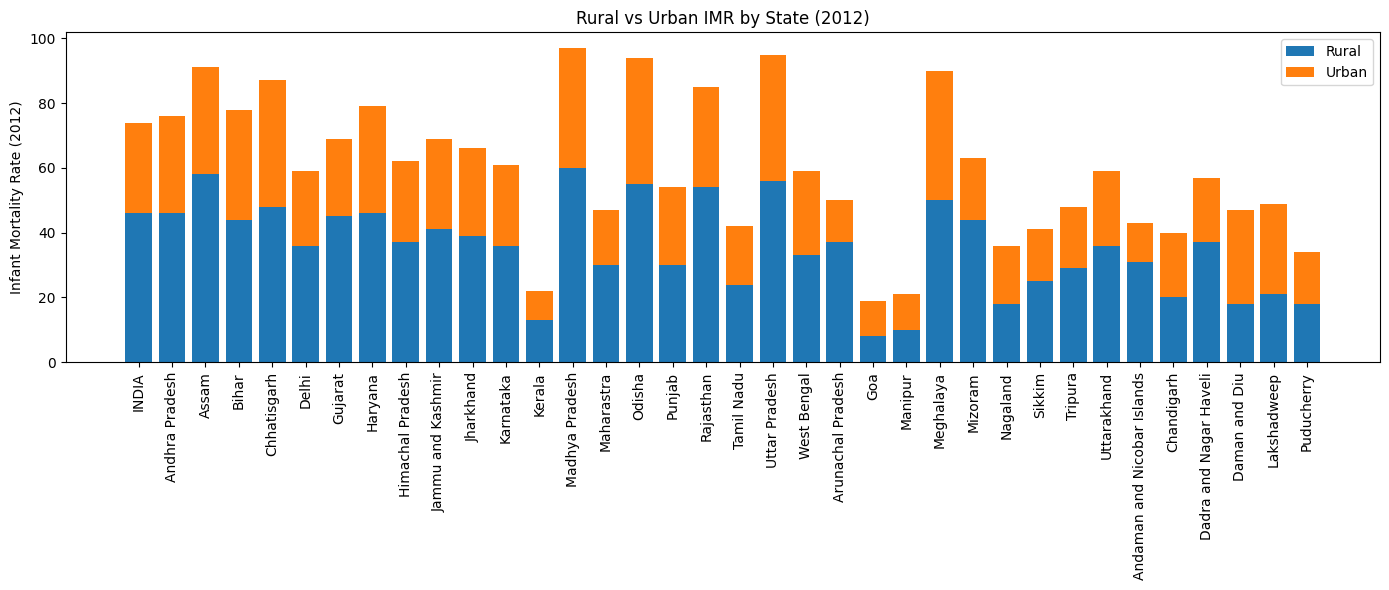

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.bar(
    residence_clean['india_states_uts'],
    residence_clean['rural_2012'],
    label='Rural'
)

plt.bar(
    residence_clean['india_states_uts'],
    residence_clean['urban_2012'],
    bottom=residence_clean['rural_2012'],
    label='Urban'
)

plt.xticks(rotation=90)
plt.ylabel("Infant Mortality Rate (2012)")
plt.title("Rural vs Urban IMR by State (2012)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

babies = dataframes['babies.csv']

X = babies[['bwt','gestation','parity','age','height','weight','smoke']].fillna(0)

# High risk = risk_score ≥ 2
babies['target'] = ((babies['bwt'] < 250) & (babies['gestation'] < 259)).astype(int)

y = babies['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", model.score(X_test, y_test))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00        24

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



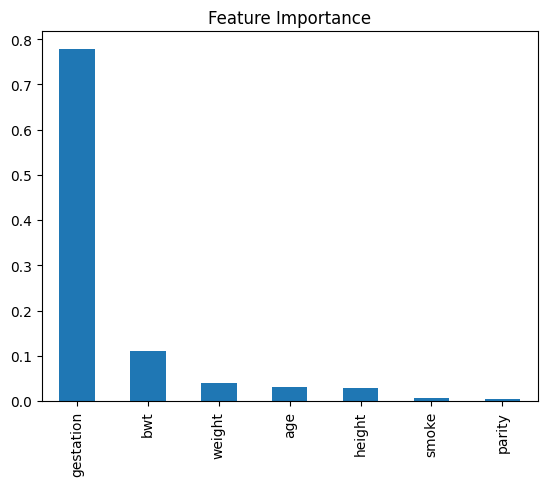

In [ ]:
importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.plot(kind='bar', title='Feature Importance')
plt.show()


In [ ]:
print(gdf.columns)


Index(['id', 'Name', 'description', 'timestamp', 'begin', 'end',
       'altitudeMode', 'tessellate', 'extrude', 'visibility', 'drawOrder',
       'icon', 'OBJECTID', 'Sl_No', 'District_Code', 'District_Name',
       'Mandal_Code', 'Mandal_Name', 'Village_Code', 'Village_Name',
       'Habitation_Code', 'Habitation_Name', 'Anganwadi_Code',
       'Anganwadi_Name', 'Total_Enrollment', 'No_of_Teachers', 'Class_rooms',
       'Toilets', 'Water_Facility', 'Electricity', 'Longitude', 'Latitude',
       'NEAR_FID', 'NEAR_DIST', 'NEAR_X', 'NEAR_Y', 'NEAR_ANGLE', 'geometry'],
      dtype='object')


In [ ]:
globals().keys()


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', 'pd', 'files', 'uploaded', '_i2', 'file_names', 'dataframes', 'file', 'df', '_i3', '_exit_code', 'gpd', 'kml', 'kml_file', 'gdf', '_3', '_i4', 'clean_dataframe', 'key', '_i5', 'plt', 'state_imr', 'state_only', 'year_cols', 'states_to_plot', 'state', 'row', '_i6', 'residence', '_i7', '_i8', 'residence_clean', '_i9', '_i10', 'train_test_split', 'classification_report', 'confusion_matrix', 'RandomForestClassifier', 'babies', 'X', 'y', 'X_train', 'X_test', 'y_train', 'y_test', '_i11', 'model', 'y_pred', '_i12', 'importance', '_i13', '_i14', '_i15', '_i16', '_i17'])

In [ ]:
print(state_imr.columns)


Index(['category', 'country_state_ut_name', 'infant_mortality_rate__1971',
       'infant_mortality_rate__1972', 'infant_mortality_rate__1973',
       'infant_mortality_rate__1974', 'infant_mortality_rate__1975',
       'infant_mortality_rate__1976', 'infant_mortality_rate__1977',
       'infant_mortality_rate__1978', 'infant_mortality_rate__1979',
       'infant_mortality_rate__1980', 'infant_mortality_rate__1981',
       'infant_mortality_rate__1982', 'infant_mortality_rate__1983',
       'infant_mortality_rate__1984', 'infant_mortality_rate__1985',
       'infant_mortality_rate__1986', 'infant_mortality_rate__1987',
       'infant_mortality_rate__1988', 'infant_mortality_rate__1989',
       'infant_mortality_rate__1990', 'infant_mortality_rate__1991',
       'infant_mortality_rate__1992', 'infant_mortality_rate__1993',
       'infant_mortality_rate__1994', 'infant_mortality_rate__1995',
       'infant_mortality_rate__1996', 'infant_mortality_rate__1997',
       'infant_mortality_rat

In [ ]:
imr = state_imr.copy()

# Select only IMR year columns
year_cols = [c for c in imr.columns if c.startswith("infant_mortality_rate__")]

# Convert to long format
imr_long = imr.melt(
    id_vars=['category', 'country_state_ut_name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='IMR'
)

# Clean year column
imr_long['Year'] = imr_long['Year'].str.replace(
    'infant_mortality_rate__', '', regex=False
).astype(int)

imr_long.head()


,category,country_state_ut_name,Year,IMR
0,Country,India (Average),1971,129.0
1,State,Andhra Pradesh,1971,106.0
2,State,Assam,1971,139.0
3,State,Bihar,1971,NaN
4,State,Chhattisgarh,1971,NaN


In [ ]:
india_imr = imr_long[
    imr_long['country_state_ut_name']
    .str.contains('india', case=False, na=False)
].sort_values('Year')

print(india_imr.shape)
india_imr.head()


(42, 4)


,category,country_state_ut_name,Year,IMR
0,Country,India (Average),1971,129.0
36,Country,India (Average),1972,139.0
72,Country,India (Average),1973,134.0
108,Country,India (Average),1974,126.0
144,Country,India (Average),1975,140.0


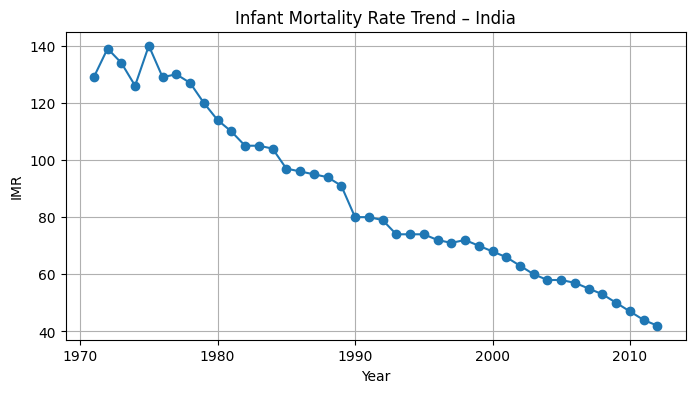

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(india_imr['Year'], india_imr['IMR'], marker='o')
plt.title("Infant Mortality Rate Trend – India")
plt.xlabel("Year")
plt.ylabel("IMR")
plt.grid(True)
plt.show()


In [ ]:
imr_long[
    imr_long['country_state_ut_name']
    .str.contains('andhra', case=False, na=False)
]['country_state_ut_name'].unique()


array(['Andhra Pradesh'], dtype=object)

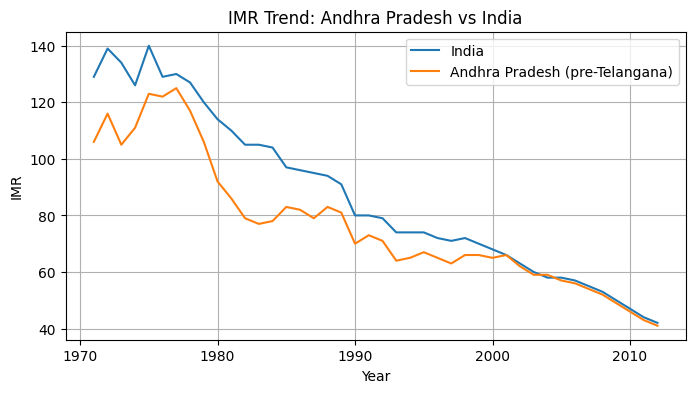

In [ ]:
ap_imr = imr_long[
    imr_long['country_state_ut_name']
    .str.contains('andhra', case=False, na=False)
].sort_values('Year')

plt.figure(figsize=(8,4))
plt.plot(india_imr['Year'], india_imr['IMR'], label='India')
plt.plot(ap_imr['Year'], ap_imr['IMR'], label='Andhra Pradesh (pre-Telangana)')

plt.title("IMR Trend: Andhra Pradesh vs India")
plt.xlabel("Year")
plt.ylabel("IMR")
plt.legend()
plt.grid(True)
plt.show()


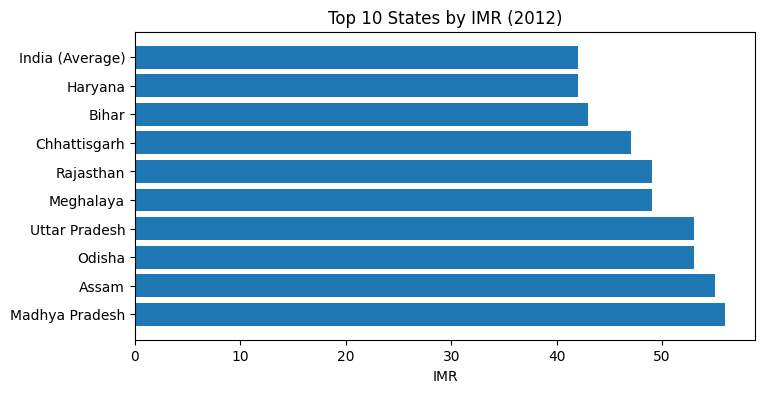

In [ ]:
latest_year = imr_long['Year'].max()

latest_imr = imr_long[imr_long['Year'] == latest_year]
top10 = latest_imr.sort_values('IMR', ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.barh(top10['country_state_ut_name'], top10['IMR'])
plt.title(f"Top 10 States by IMR ({latest_year})")
plt.xlabel("IMR")
plt.show()


In [ ]:
awc[['Water_Facility', 'Electricity', 'Toilets']].dtypes


,0
Water_Facility,object
Electricity,object
Toilets,object


In [ ]:
awc['Water_Facility_num'] = awc['Water_Facility'].map({'YES': 1, 'NO': 0})
awc['Electricity_num'] = awc['Electricity'].map({'YES': 1, 'NO': 0})

awc['Toilets_num'] = pd.to_numeric(awc['Toilets'], errors='coerce').fillna(0)


In [ ]:
awc['infra_score'] = (
    awc['Water_Facility_num'] +
    awc['Electricity_num'] +
    awc['Toilets_num']
)

awc['infra_score'].describe()


,infra_score
count,35342.000000
mean,1.274461
std,0.534319
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
infra_rank = awc['infra_score'].rank(pct=True)

awc['final_risk_score'] = (
    (1 - infra_rank) * 3   # higher risk for lower infra
)


In [ ]:
awc[['infra_score', 'final_risk_score']].head()


,infra_score,final_risk_score
0,1.0,1.911649
1,2.0,0.476416
2,1.0,1.911649
3,2.0,0.476416
4,1.0,1.911649


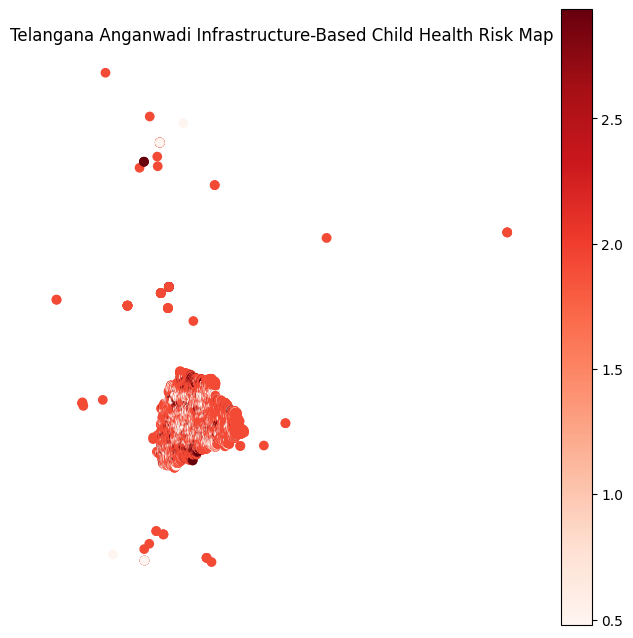

In [ ]:
awc.plot(
    column='final_risk_score',
    cmap='Reds',
    legend=True,
    figsize=(8,8)
)
plt.title("Telangana Anganwadi Infrastructure-Based Child Health Risk Map")
plt.axis('off')
plt.show()
